In [1]:
# librerías a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### ETL

In [2]:
# lectura del archivo Game del dataset NBA
juego = pd.read_csv("game.csv")

In [3]:
# conteo de filas y columnas
np.shape(juego)

(65698, 55)

In [4]:
# consulta de primeras cinco filas para ver el contenido del dataframe
juego.head()

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
0,21946,1610610035,HUS,Toronto Huskies,24600001,1946-11-01 00:00:00,HUS vs. NYK,L,0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,2,0,Regular Season
1,21946,1610610034,BOM,St. Louis Bombers,24600003,1946-11-02 00:00:00,BOM vs. PIT,W,0,20.0,...,NaN,NaN,NaN,NaN,NaN,25.0,51.0,-5,0,Regular Season
2,21946,1610610032,PRO,Providence Steamrollers,24600002,1946-11-02 00:00:00,PRO vs. BOS,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,53.0,-6,0,Regular Season
3,21946,1610610025,CHS,Chicago Stags,24600004,1946-11-02 00:00:00,CHS vs. NYK,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,22.0,47.0,-16,0,Regular Season
4,21946,1610610028,DEF,Detroit Falcons,24600005,1946-11-02 00:00:00,DEF vs. WAS,L,0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,50.0,17,0,Regular Season


In [4]:
# filtrado por rango de fecha que se utilizará para el análisis
# el rango de fecha corresponde a las temporadas completas: 2021-2022 y 2022-2023 
juego_fecha_filtrada = juego[juego["game_date"] > "2021-10-18"]

In [5]:
# conteo de filas y columnas del nuevo dataframe
np.shape(juego_fecha_filtrada)

(2704, 55)

In [7]:
juego_fecha_filtrada.value_counts("team_name_home")

team_name_home
Boston Celtics            107
Miami Heat                105
Golden State Warriors     104
Phoenix Suns               97
Denver Nuggets             97
Philadelphia 76ers         95
Los Angeles Lakers         94
Milwaukee Bucks            94
Memphis Grizzlies          93
Dallas Mavericks           91
New York Knicks            90
LA Clippers                88
Brooklyn Nets              88
Minnesota Timberwolves     88
Atlanta Hawks              88
Sacramento Kings           88
Toronto Raptors            88
New Orleans Pelicans       87
Utah Jazz                  87
Cleveland Cavaliers        87
Chicago Bulls              87
San Antonio Spurs          85
Charlotte Hornets          85
Oklahoma City Thunder      85
Indiana Pacers             84
Detroit Pistons            84
Houston Rockets            84
Orlando Magic              84
Portland Trail Blazers     84
Washington Wizards         83
Team LeBron                 3
Name: count, dtype: int64

In [15]:
# cantidad de equipos que jugaron de locales
home = juego_fecha_filtrada["team_name_home"].nunique()
print(home)

31


In [16]:
# cantidad de equipos que jugaron de visitantes
away = juego_fecha_filtrada["team_name_away"].nunique()
print(away)

34


In [6]:
# verificación de datos nulos
juego_fecha_filtrada.isnull().sum()[juego_fecha_filtrada.isnull().sum()>0]

ft_pct_home    2
dtype: int64

In [7]:
# reemplazo de los dos datos nulos por promedio de Porcentaje de tiros libres encestados por el equipo local. 
juego_fecha_filtrada["ft_pct_home"].fillna(juego_fecha_filtrada["ft_pct_home"].mean(), inplace=True)

C:\Users\sosab\AppData\Local\Temp\ipykernel_15032\2200482229.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  juego_fecha_filtrada["ft_pct_home"].fillna(juego_fecha_filtrada["ft_pct_home"].mean(), inplace=True)
C:\Users\sosab\AppData\Local\Temp\ipykernel_15032\2200482229.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  juego_fecha_filtra

In [8]:
# verificación de reemplazo de los datos nulos
juego_fecha_filtrada.isnull().sum()[juego_fecha_filtrada.isnull().sum()>0]

Series([], dtype: int64)

In [9]:
# Se convierte la columna de fechas a datetime y se la establece como índice del dataframe 
# con el fin de poder utilizarla para analizar los datos a través del tiempo (en gráficos junto a la función .resample()).
juego_fecha_filtrada["game_date"] = pd.to_datetime(juego_fecha_filtrada["game_date"]) 
juego_fecha_filtrada.set_index("game_date", inplace=True) 

C:\Users\sosab\AppData\Local\Temp\ipykernel_15032\1143404128.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  juego_fecha_filtrada["game_date"] = pd.to_datetime(juego_fecha_filtrada["game_date"])


In [10]:
# eliminación de columnas no relevantes para el análisis
juego_fecha_filtrada = juego_fecha_filtrada.drop(["video_available_home", "video_available_away"], axis=1)

In [11]:
# verificación de datos duplicados
datos_duplicados = juego_fecha_filtrada.duplicated("game_id")
print(datos_duplicados)

game_date
2021-10-19    False
2021-10-19    False
2021-10-20    False
2021-10-20    False
2021-10-20    False
              ...  
2023-06-07    False
2023-06-09    False
2023-06-12    False
2023-02-19    False
2023-02-19     True
Length: 2704, dtype: bool


In [13]:
juego_fecha_filtrada = juego_fecha_filtrada.drop_duplicates(["game_id"], keep='last')

In [14]:
# guardado de datos limpios
juego_fecha_filtrada.to_csv("PF_GameDataFinal.csv")

#### EDA

In [15]:
# lectura de archivo PF_GameDataFinal.csv
juego_fecha_filtrada = pd.read_csv("PF_GameDataFinal.csv")

In [16]:
# Se convierte la columna de fechas a datetime y se la establece como índice del dataframe 
# con el fin de poder utilizarla para analizar los datos a través del tiempo (en gráficos junto a la función .resample()).
juego_fecha_filtrada["game_date"] = pd.to_datetime(juego_fecha_filtrada["game_date"]) 
juego_fecha_filtrada.set_index("game_date", inplace=True) 

Se observa una tendencia de victorias de los equipos locales, mas del 50% de los partidos los ganan los equipos locales.

In [17]:
# impresión de información general de las columnas, verificación de tipo de datos y medidas estadísticas de columnas numéricas
for columna in juego_fecha_filtrada.columns:
    print(columna)
    print(juego_fecha_filtrada[columna].describe())
    print("-----------------------------")

season_id
count     2703.000000
mean     23035.200888
std       5191.437546
min      12022.000000
25%      22021.000000
50%      22022.000000
75%      22022.000000
max      42022.000000
Name: season_id, dtype: float64
-----------------------------
team_id_home
count    2.703000e+03
mean     1.610613e+09
std      1.113702e+02
min      1.610613e+09
25%      1.610613e+09
50%      1.610613e+09
75%      1.610613e+09
max      1.610617e+09
Name: team_id_home, dtype: float64
-----------------------------
team_abbreviation_home
count     2703
unique      31
top        BOS
freq       107
Name: team_abbreviation_home, dtype: object
-----------------------------
team_name_home
count               2703
unique                31
top       Boston Celtics
freq                 107
Name: team_name_home, dtype: object
-----------------------------
game_id
count    2.703000e+03
mean     2.316550e+07
std      5.188691e+06
min      1.220000e+07
25%      2.210061e+07
50%      2.220005e+07
75%      2.220073e+0

In [18]:
# función que describe datos estadísticos de las columnas numéricas
def describir_datos_estadisticos(df):
  for columna in df.columns:
    if df[columna].dtype == "float64" or df[columna].dtype == "int64":
        print(columna)
        print("Mediana:", df[columna].median())
        print("Varianza:", df[columna].var())
        print("Rango:", df[columna].max() - df[columna].min())
        print("Moda", df[columna].mode()[0]) # se coloca [0] para que solo imprima un valor moda (cuando haya mas de uno)
        print("----------------")

In [19]:
# impresión de datos estadísticos
describir_datos_estadisticos(juego_fecha_filtrada)

season_id
Mediana: 22022.0
Varianza: 26951023.791235324
Rango: 30000
Moda 22021
----------------
team_id_home
Mediana: 1610612751.0
Varianza: 12403.312652306988
Rango: 4097
Moda 1610612738
----------------
game_id
Mediana: 22200052.0
Varianza: 26922518176842.93
Rango: 30000404
Moda 12200001
----------------
min
Mediana: 240.0
Varianza: 45.299685110137524
Rango: 94
Moda 240
----------------
fgm_home
Mediana: 41.0
Varianza: 28.132778969442892
Rango: 56.0
Moda 42.0
----------------
fga_home
Mediana: 88.0
Varianza: 52.83197576615944
Rango: 65.0
Moda 86.0
----------------
fg_pct_home
Mediana: 0.471
Varianza: 0.0031540454033994088
Rango: 0.3990000000000001
Moda 0.5
----------------
fg3m_home
Mediana: 12.0
Varianza: 14.95941456062335
Rango: 24.0
Moda 12.0
----------------
fg3a_home
Mediana: 34.0
Varianza: 47.17778009629895
Rango: 46.0
Moda 34.0
----------------
fg3_pct_home
Mediana: 0.357
Varianza: 0.007102527290591668
Rango: 0.541
Moda 0.333
----------------
ftm_home
Mediana: 17.0
Varianza: 

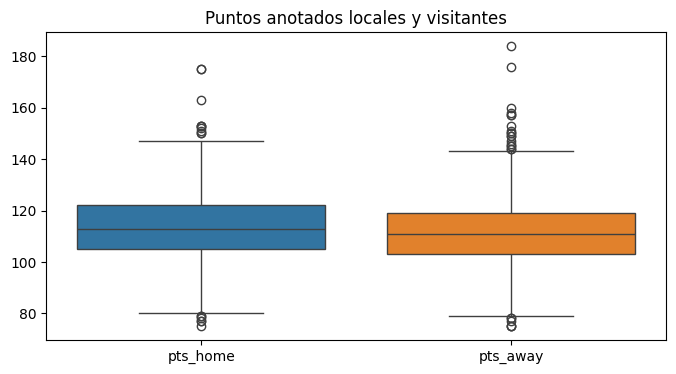

In [20]:
# Gráfico de caja para analizar los puntos anotados por equipos de locales y visitantes
plt.figure(figsize=(8, 4))
sns.boxplot(data=juego_fecha_filtrada[["pts_home", "pts_away"]]) 
plt.title("Puntos anotados locales y visitantes")
plt.show()

En el gráfico anterior se observan algunos valores significativamente alejados del resto de los datos. Luego de analizar cada uno se observa:
- Los valores atípicos corresponden a dos partidos disputados en temporada All Star y un partido en temporada regular.
- Los valores atípicos en equipos locales y visitantes pertenecen a los mismos partidos (dos partidos ganados por equipos visistantes y uno por equipo local).
- Los equipos participantes son: Team LeBron (LBN), LA Clippers (LAC), Sacramento Kings (SAC), Team Giannis (GNS), Team Durant (DRT).

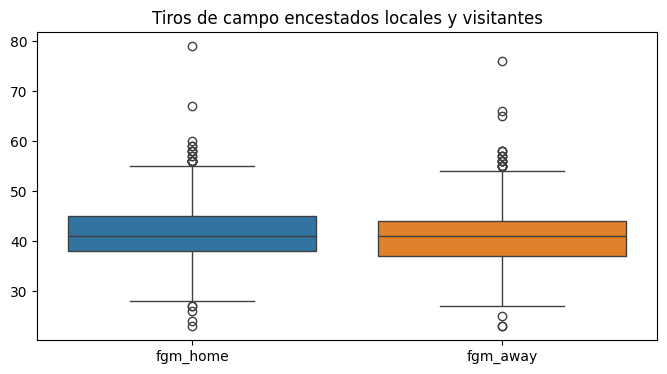

In [21]:
# Gráfico de caja para analizar los tiros de campo encestados por equipos locales y visitantes
plt.figure(figsize=(8, 4))
sns.boxplot(data=juego_fecha_filtrada[["fgm_home", "fgm_away"]]) 
plt.title("Tiros de campo encestados locales y visitantes")
plt.show()

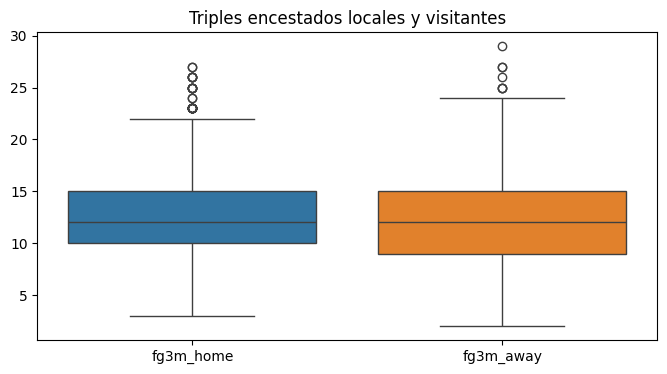

In [22]:
# Gráfico de caja para analizar los triples encestados por equipos locales y visitantes
plt.figure(figsize=(8, 4))
sns.boxplot(data=juego_fecha_filtrada[["fg3m_home", "fg3m_away"]]) 
plt.title("Triples encestados locales y visitantes")
plt.show()

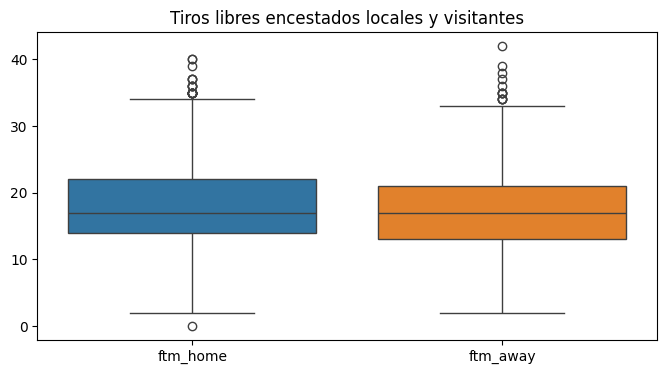

In [23]:
# Gráfico de caja para analizar los tiros libres encestados por equipos locales y visitantes
plt.figure(figsize=(8, 4))
sns.boxplot(data=juego_fecha_filtrada[["ftm_home", "ftm_away"]]) 
plt.title("Tiros libres encestados locales y visitantes")
plt.show()

Luego de analizar los tres gráficos anteriores se determina:
- Los valores atípicos de Tiros de Campo encestados, tanto locales como visitantes, pertenecen a tres partidos disputados en All Star. Correspondiendo estos valores a los mismos partidos mencionados en el primer gráfico.
- Los outliers de Triples encestados por equipos locales, pertenecen un 17% a BOS y un 17% a GSW. El 97% de los partidos donde se encuentran estos valores fueron ganados.
- Los outliers de Triples encestados por equipos visitantes, pertenecen un 15% a MIL, un 11% a GSW y un 11% a MIN. El 100% de los partidos donde se encuentran estos valores fueron ganados.
- Los outliers de Tiros libres encestados por equipos locales, pertenecen un 20% a POR y un 20% a MIA. El 80% de los partidos donde se encuentran estos valores fueron ganados.
- Los outliers de Tiros libres encestados por equipos visitantes, pertenecen un 40% a POR. El 80% de los partidos donde se encuentran estos valores fueron ganados.

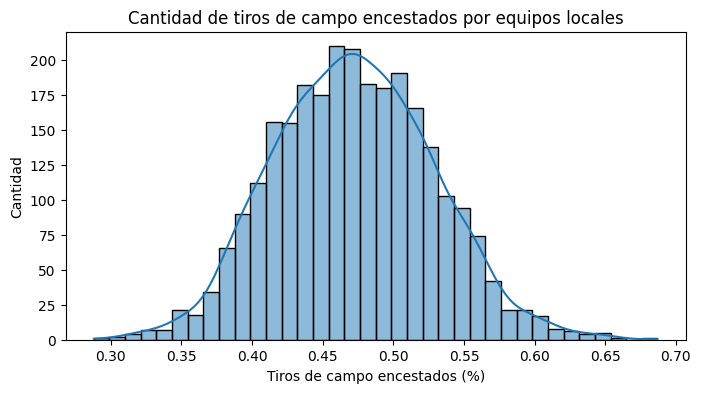

In [24]:
# histograma de tiros de campo encestados
plt.figure(figsize=(8, 4))
sns.histplot(juego_fecha_filtrada["fg_pct_home"], kde=True)
plt.xlabel("Tiros de campo encestados (%)")
plt.ylabel("Cantidad")
plt.title("Cantidad de tiros de campo encestados por equipos locales")
plt.show()

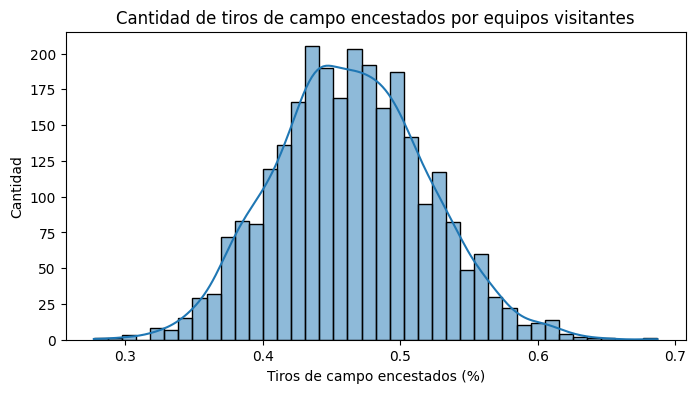

In [25]:
# histograma de tiros de campo encestados
plt.figure(figsize=(8, 4))
sns.histplot(juego_fecha_filtrada["fg_pct_away"], kde=True)
plt.xlabel("Tiros de campo encestados (%)")
plt.ylabel("Cantidad")
plt.title("Cantidad de tiros de campo encestados por equipos visitantes")
plt.show()

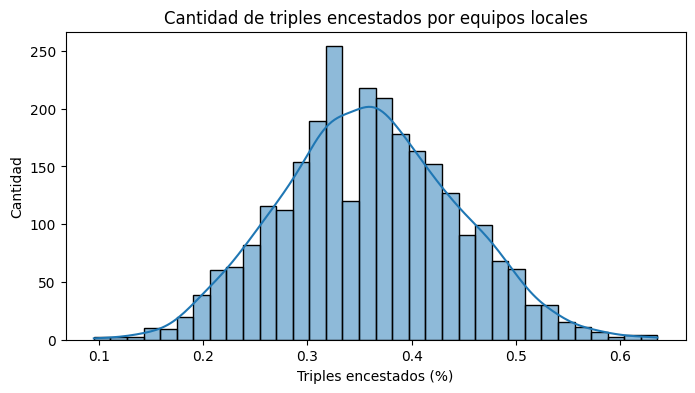

In [26]:
# histograma de triples encestados
plt.figure(figsize=(8, 4))
sns.histplot(juego_fecha_filtrada["fg3_pct_home"], kde=True)  
plt.xlabel("Triples encestados (%)")
plt.ylabel("Cantidad")
plt.title("Cantidad de triples encestados por equipos locales")
plt.show()

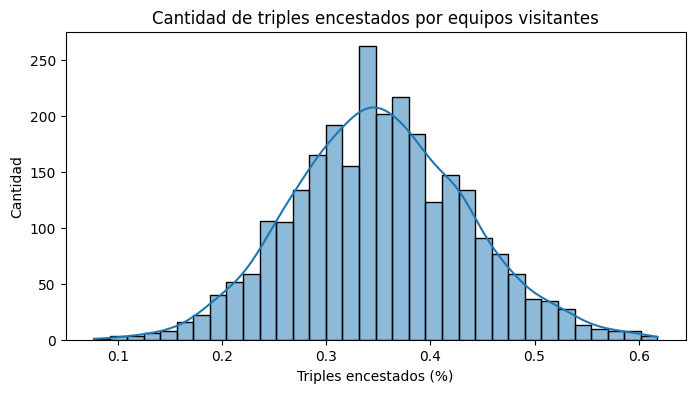

In [27]:
# histograma de triples encestados
plt.figure(figsize=(8, 4))
sns.histplot(juego_fecha_filtrada["fg3_pct_away"], kde=True)  
plt.xlabel("Triples encestados (%)")
plt.ylabel("Cantidad")
plt.title("Cantidad de triples encestados por equipos visitantes")
plt.show()

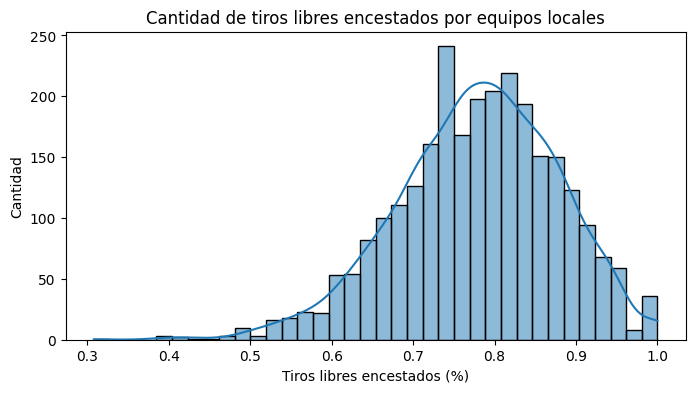

In [28]:
# histograma de tiros libres encestados
plt.figure(figsize=(8, 4))
sns.histplot(juego_fecha_filtrada["ft_pct_home"], kde=True)
plt.xlabel("Tiros libres encestados (%)")
plt.ylabel("Cantidad")
plt.title("Cantidad de tiros libres encestados por equipos locales")
plt.show()

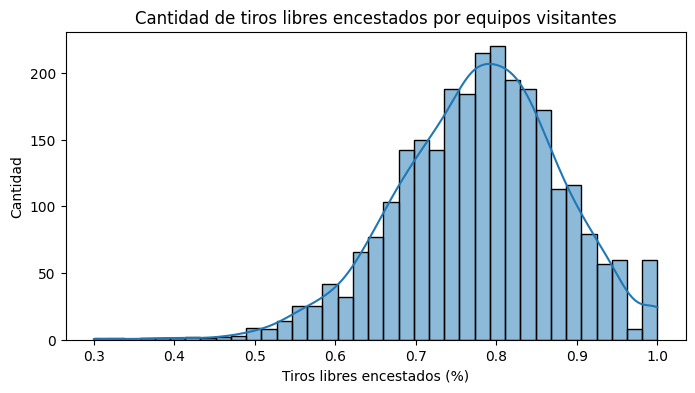

In [29]:
# histograma de tiros libres encestados
plt.figure(figsize=(8, 4))
sns.histplot(juego_fecha_filtrada["ft_pct_away"], kde=True)
plt.xlabel("Tiros libres encestados (%)")
plt.ylabel("Cantidad")
plt.title("Cantidad de tiros libres encestados por equipos visitantes")
plt.show()

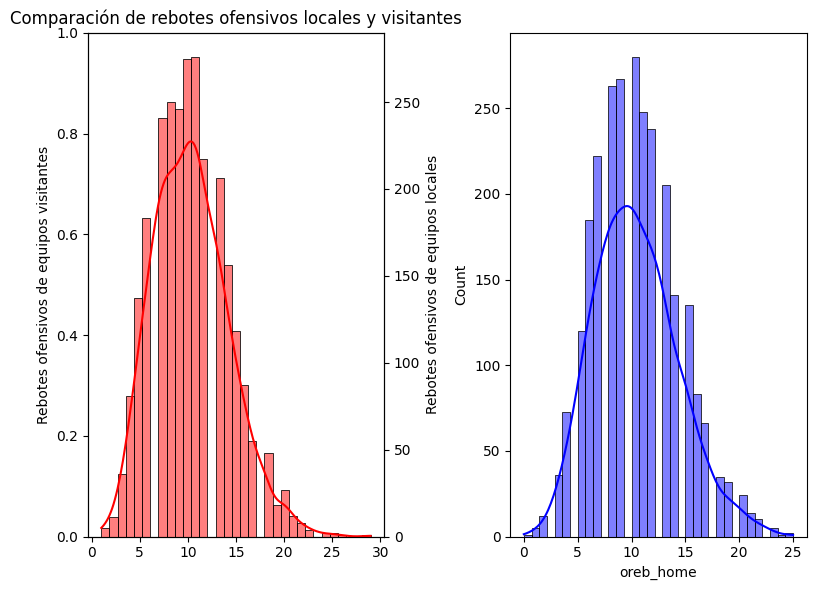

In [30]:
# comparación de rebotes ofensivos capturados por locales y visitantes
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(8, 6))
sns.histplot (data=juego_fecha_filtrada, x="oreb_home", color="blue", kde=True)
ax2 = ax.twinx() # los dos graficos comparten el eje x
sns.histplot(data=juego_fecha_filtrada, x="oreb_away", color="red", kde=True, ax=ax2)
plt.xticks(rotation=90)
ax.set_ylabel("Rebotes ofensivos de equipos visitantes")
ax2.set_ylabel("Rebotes ofensivos de equipos locales")
plt.title("Comparación de rebotes ofensivos locales y visitantes")
plt.tight_layout()
plt.show()

El gráfico anterior muestra que la cantidad de rebotes ofensivos capturados por los equipos locales y visitantes sigue patrones similares. Si bien existe una leve tendencia a favor de los equipos locales, esta diferencia es muy pequeña y podría deberse a factores aleatorios.

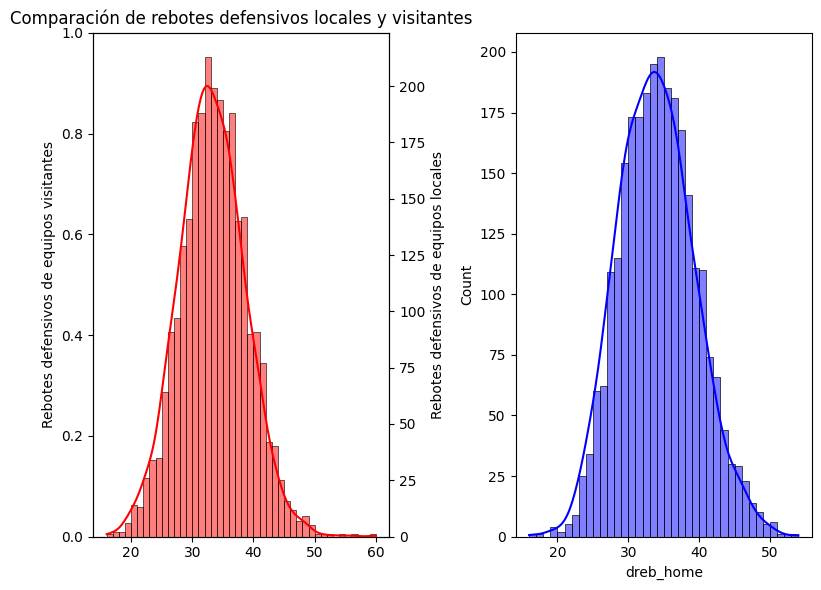

In [31]:
# comparación de rebotes defensivos capturados por locales y visitantes
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(8, 6))
sns.histplot (data=juego_fecha_filtrada, x="dreb_home", color="blue", kde=True)
ax2 = ax.twinx() # los dos graficos comparten el eje x
sns.histplot(data=juego_fecha_filtrada, x="dreb_away", color="red", kde=True, ax=ax2)
plt.xticks(rotation=90)
ax.set_ylabel("Rebotes defensivos de equipos visitantes")
ax2.set_ylabel("Rebotes defensivos de equipos locales")
plt.title("Comparación de rebotes defensivos locales y visitantes")
plt.tight_layout() # ajusta los elementos del gráfico para evitar que se superpongan
plt.show()

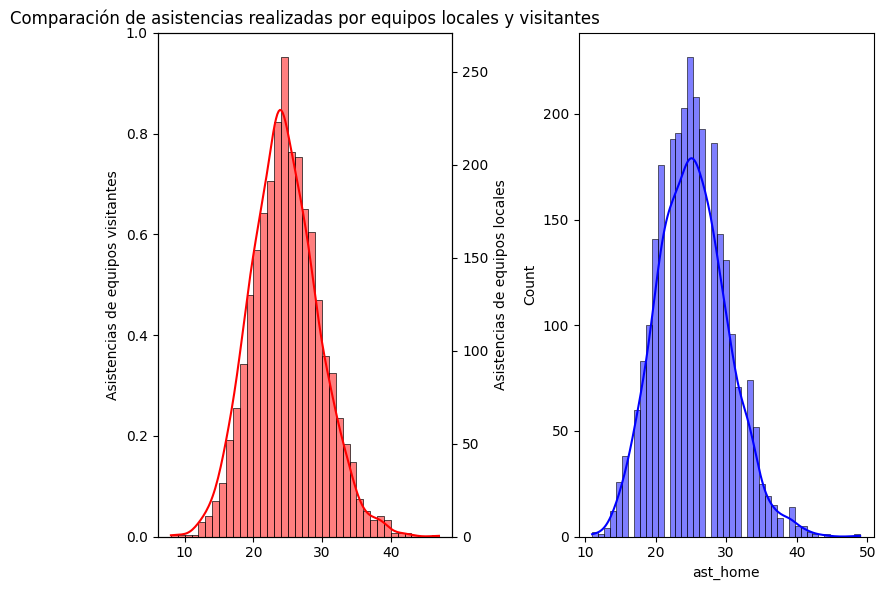

In [32]:
# comparación de asistencias realizadas locales y visitantes
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(8, 6))
sns.histplot (data=juego_fecha_filtrada, x="ast_home", color="blue", kde=True)
ax2 = ax.twinx() # los dos graficos comparten el eje x
sns.histplot(data=juego_fecha_filtrada, x="ast_away", color="red", kde=True, ax=ax2)
plt.xticks(rotation=90)
ax.set_ylabel("Asistencias de equipos visitantes")
ax2.set_ylabel("Asistencias de equipos locales")
plt.title("Comparación de asistencias realizadas por equipos locales y visitantes")
plt.tight_layout()
plt.show()

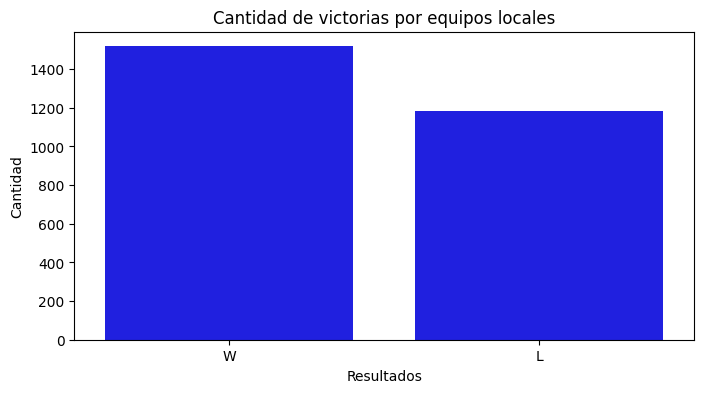

In [33]:
# Victorias (W) por equipor locales (L: derrotas)
plt.figure(figsize=(8, 4))
sns.countplot(x="wl_home", data=juego_fecha_filtrada, color="blue")
plt.ylabel("Cantidad")
plt.xlabel("Resultados")
plt.title("Cantidad de victorias por equipos locales")
plt.show()


En el gráfico anterior se puede observar que los equipos locales tienden a obtener la victoria del partido.

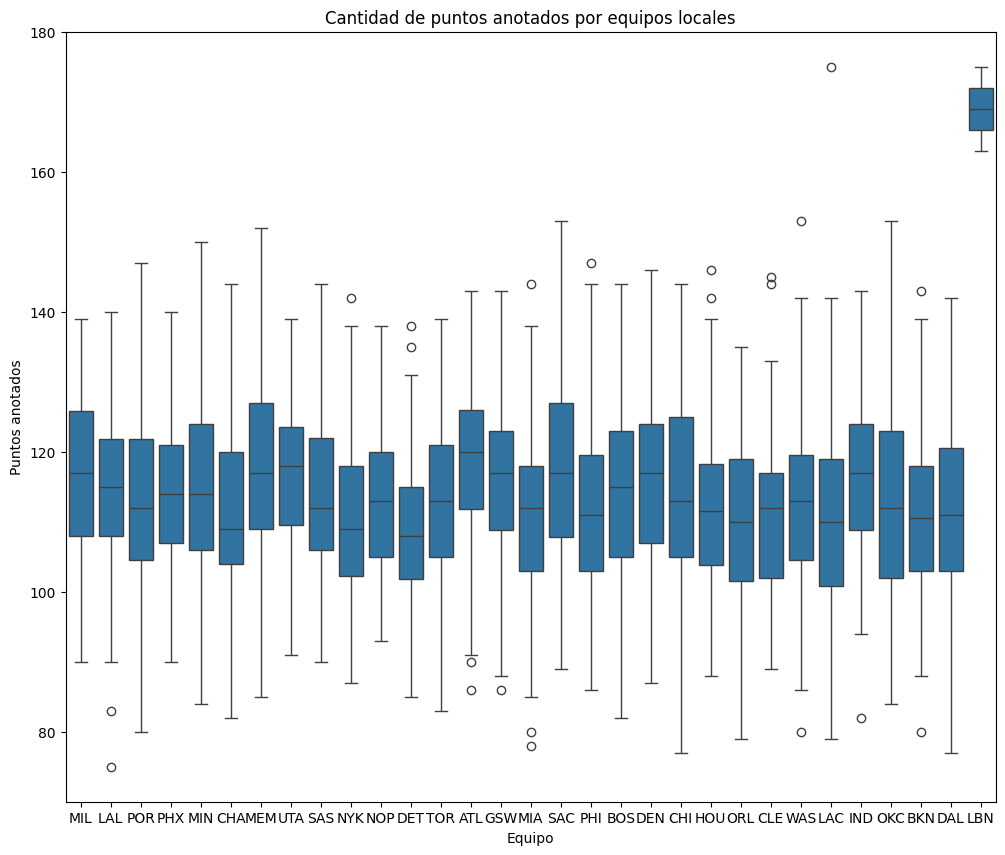

In [34]:
# Análisis de puntos anotados por equipos locales
plt.figure(figsize=(12, 10))
sns.boxplot(x="team_abbreviation_home", y="pts_home", data=juego_fecha_filtrada)
plt.ylabel("Puntos anotados")
plt.xlabel("Equipo")
plt.title("Cantidad de puntos anotados por equipos locales")
plt.show()

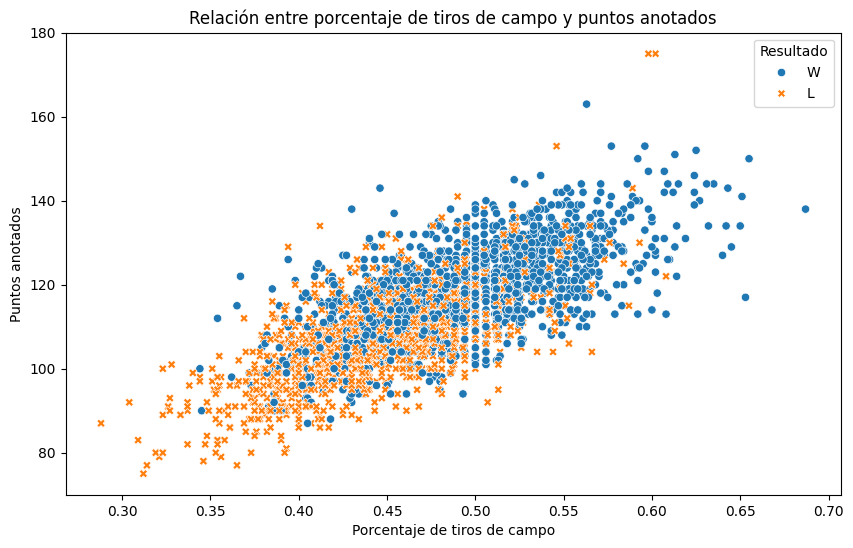

In [35]:
# análisis de la relación entre el porcentaje de tiros de campo convertidos por un equipo en un partido y 
# la cantidad total de puntos que ese equipo anotó
plt.figure(figsize=(10, 6))
sns.scatterplot(x="fg_pct_home", y="pts_home", data=juego_fecha_filtrada, hue="wl_home", style="wl_home")
plt.title("Relación entre porcentaje de tiros de campo y puntos anotados")
plt.xlabel("Porcentaje de tiros de campo")
plt.ylabel("Puntos anotados")
plt.legend(title="Resultado")
plt.show()

En el gráfico anterior se observa una clara tendencia positiva. Es decir que, en general, a medida que aumenta el porcentaje de tiros de campo encestados, también aumenta la cantidad de puntos anotados y por lo tanto, es mayor el número de victorias.

#### EDA TOP 10

In [36]:
# top 10 de equipos con más puntos obtenidos jugando de locales
top_10_total_puntos_locales = juego_fecha_filtrada.groupby("team_abbreviation_home")["pts_home"].sum().nlargest(10)
print (top_10_total_puntos_locales)

team_abbreviation_home
BOS    12203.0
GSW    12089.0
MIA    11596.0
DEN    11277.0
PHX    11145.0
MEM    10978.0
MIL    10913.0
LAL    10732.0
PHI    10569.0
ATL    10379.0
Name: pts_home, dtype: float64


In [37]:
# top 10 de equipos con más puntos obtenidos jugando de visitantes
top_10_total_puntos_visitantes = juego_fecha_filtrada.groupby("team_abbreviation_away")["pts_away"].sum().nlargest(10)
print (top_10_total_puntos_visitantes)

team_abbreviation_away
BOS    11903.0
MIA    11340.0
GSW    11261.0
DEN    10846.0
PHI    10728.0
MIN    10706.0
PHX    10697.0
MEM    10622.0
MIL    10498.0
LAL    10477.0
Name: pts_away, dtype: float64


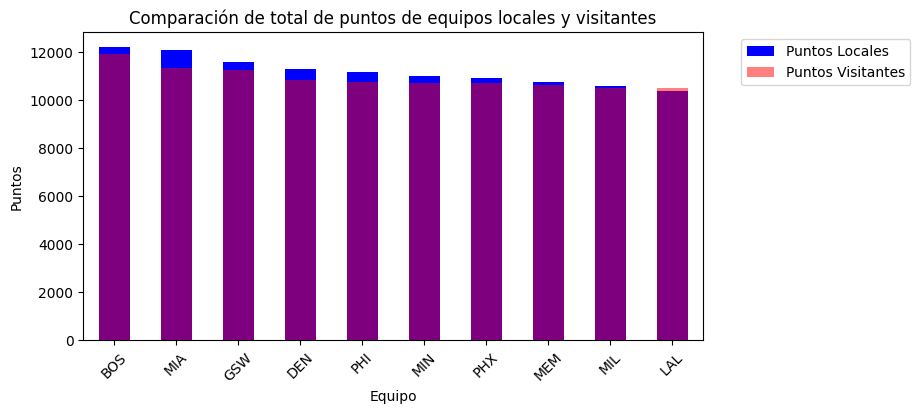

In [38]:
# comparación de total de puntos de equipos locales y visitantes
plt.figure(figsize=(8, 4))
top_10_total_puntos_locales.sort_values(ascending=False).plot(kind="bar", color="blue", label="Puntos Locales") 
top_10_total_puntos_visitantes.sort_values(ascending=False).plot(kind="bar", color="red", alpha=0.5, label="Puntos Visitantes")
plt.xticks(rotation=45)
plt.xlabel("Equipo")
plt.ylabel("Puntos")
plt.title("Comparación de total de puntos de equipos locales y visitantes")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

El gráfico anterior muestra que los equipos que más puntos han acumulado jugando de locales en las dos últimas temporadas, también son los que más puntos acumularon jugando de visitantes.

In [39]:
# variable que contenga el top 10 de equipos con más puntos acumulados
top_10_equipos = ["BOS", "GSW", "MIA", "DEN", "PHI", "PHX", "MEM", "MIL", "LAL", "MIN"]
# se crean los dos dataframe donde se guardan los equipos del top 10
top_10_equipos_locales = juego_fecha_filtrada[juego_fecha_filtrada["team_abbreviation_home"].isin(top_10_equipos)]
top_10_equipos_visitantes = juego_fecha_filtrada[juego_fecha_filtrada["team_abbreviation_away"].isin(top_10_equipos)]

In [40]:
# faltas cometidas por los equipos de locales del top 10
faltas_equipos_locales = top_10_equipos_locales.groupby("team_abbreviation_home")["pf_home"].sum().sort_values(ascending=False)
print(faltas_equipos_locales)

team_abbreviation_home
GSW    2185.0
MIA    2041.0
PHX    1969.0
BOS    1955.0
DEN    1924.0
MIN    1912.0
PHI    1887.0
LAL    1812.0
MEM    1766.0
MIL    1752.0
Name: pf_home, dtype: float64


In [41]:
# faltas cometidas por los equipos de visitantes del top 10
faltas_equipos_visitantes = top_10_equipos_visitantes.groupby("team_abbreviation_away")["pf_away"].sum().sort_values(ascending=False)
print(faltas_equipos_visitantes)

team_abbreviation_away
GSW    2201.0
MIA    2121.0
BOS    2049.0
PHX    2036.0
MIN    2024.0
MEM    1964.0
PHI    1920.0
DEN    1854.0
LAL    1729.0
MIL    1663.0
Name: pf_away, dtype: float64


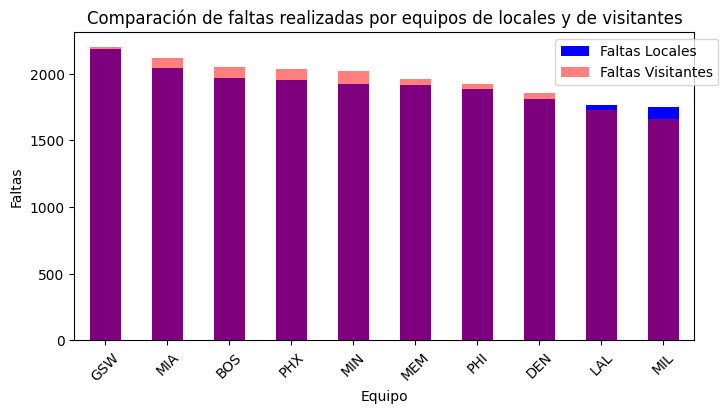

In [42]:
# comparación faltas de equipos de locales y de visitantes
plt.figure(figsize=(8, 4))
faltas_equipos_locales.sort_values(ascending=False).plot(kind="bar", color="blue", label="Faltas Locales") 
faltas_equipos_visitantes.sort_values(ascending=False).plot(kind="bar", color="red", alpha=0.5 , label="Faltas Visitantes")
plt.xticks(rotation=45)
plt.xlabel("Equipo")
plt.ylabel("Faltas")
plt.title("Comparación de faltas realizadas por equipos de locales y de visitantes")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper right")
plt.show()

El gráfico muestra que los equipos que más faltas cometen, lo hacen tanto de locales como de visitantes. Además, se puede ver que los equipos con más faltas también son los que más puntos anotan.

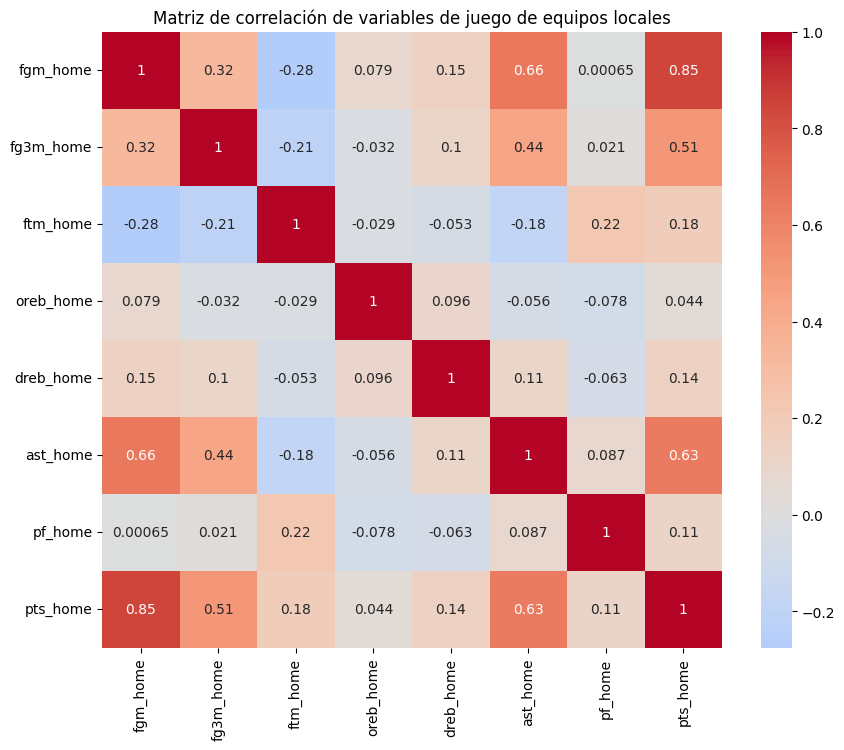

In [43]:
# se selecciona un subjconjunto de columnas para realizar análisis de correlación
columnas = ["fgm_home", "fg3m_home", "ftm_home", "oreb_home", "dreb_home", "ast_home", "pf_home", "pts_home"]
matriz_correlacion = top_10_equipos_locales[columnas].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de correlación de variables de juego de equipos locales")
plt.show()

En el heatmap se observa que los tiros de campo encestados, los triples encestados y las asistencias realizadas son las variables de juego que tienen una fuerte correlación positiva con los puntos anotados.

In [44]:
# creación de columnas de ritmo de juego en ambos dataframe 
top_10_equipos_locales["ritmo_juego_home"] = (top_10_equipos_locales["fga_home"] + 0.44 * top_10_equipos_locales["fta_home"] + top_10_equipos_locales["tov_home"]) / 2
top_10_equipos_visitantes["ritmo_juego_away"] = (top_10_equipos_visitantes["fga_away"] + 0.44 * top_10_equipos_visitantes["fta_away"] + top_10_equipos_visitantes["tov_away"]) / 2

C:\Users\sosab\AppData\Local\Temp\ipykernel_15032\1316730234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_equipos_locales["ritmo_juego_home"] = (top_10_equipos_locales["fga_home"] + 0.44 * top_10_equipos_locales["fta_home"] + top_10_equipos_locales["tov_home"]) / 2
C:\Users\sosab\AppData\Local\Temp\ipykernel_15032\1316730234.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_equipos_visitantes["ritmo_juego_away"] = (top_10_equipos_visitantes["fga_away"] + 0.44 * top_10_equipos_visitant

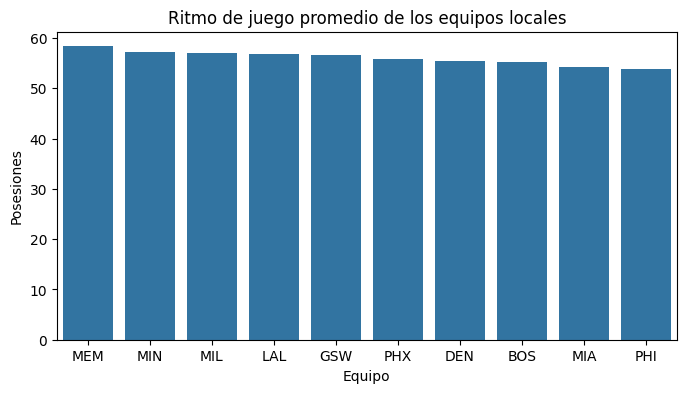

In [45]:
# comparación entre los equipos locales del top 10 en cuanto a número aproximado de posesiones de balón 
promedio_ritmo_juego_equipos_locales = top_10_equipos_locales.groupby("team_abbreviation_home")["ritmo_juego_home"].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 4))
sns.barplot(data=promedio_ritmo_juego_equipos_locales)
plt.xlabel("Equipo")
plt.ylabel("Posesiones")
plt.title("Ritmo de juego promedio de los equipos locales")
plt.show()

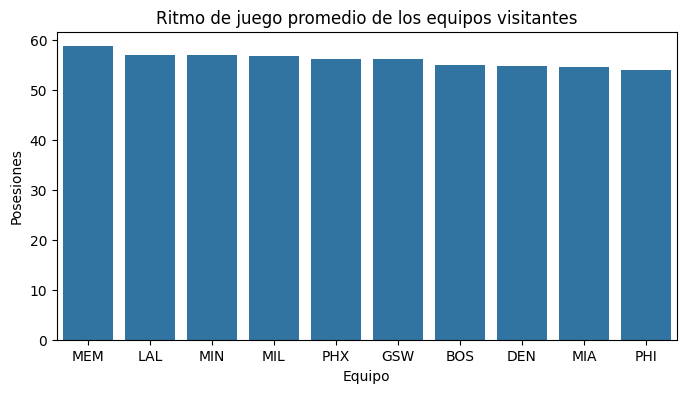

In [46]:
# comparación entre los equipos visitantes del top 10 en cuanto a número aproximado de posesiones de balón 
promedio_ritmo_juego_equipos_visitantes = top_10_equipos_visitantes.groupby("team_abbreviation_away")["ritmo_juego_away"].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 4))
sns.barplot(data=promedio_ritmo_juego_equipos_visitantes)
plt.xlabel("Equipo")
plt.ylabel("Posesiones")
plt.title("Ritmo de juego promedio de los equipos visitantes")
plt.show()


Analizados ambos gráficos se determina que los cinco equipos con el ritmo de juego más alto son MEM, MIN, MIL, LAL, GSW. Esto indica, que son los equipos que desarrollan a más velocidad cada partido (sea de local o de visitante), teniendo muchas posesiones y acciones ofensivas.